In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Data source: https://www.kaggle.com/datasets/rishabjadhav/nfl-passing-statistics-2001-2023

In [292]:
df_nfl = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/passing_cleaned.csv', header=0, 
                     index_col=0)

In [293]:
df_nfl.drop(['GS', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Yds-s', 'NY/A', 'ANY/A'], axis=1, inplace=True)

In [294]:
df_nfl.head()

,Player,Tm,Age,G,Cmp,Att,Cmp%,Yds,TD,TD%,Int,Int%,1D,Rate,Sk,Sk%,Year
0,Kurt Warner,STL,30,16,375,546,68.7,4830,36,6.6,22,4.0,233,101.4,38,6.5,2001
1,Peyton Manning,IND,25,16,343,547,62.7,4131,26,4.8,23,4.2,201,84.1,29,5.0,2001
2,Brett Favre,GNB,32,16,314,510,61.6,3921,32,6.3,15,2.9,187,94.1,22,4.1,2001
3,Aaron Brooks,NOR,25,16,312,558,55.9,3832,26,4.7,22,3.9,182,76.4,50,8.2,2001
4,Rich Gannon,OAK,36,16,361,549,65.8,3828,27,4.9,9,1.6,195,95.5,27,4.7,2001


In [295]:
df_nfl.dtypes

Player     object
Tm         object
Age         int64
G           int64
Cmp         int64
Att         int64
Cmp%      float64
Yds         int64
TD          int64
TD%       float64
Int         int64
Int%      float64
1D          int64
Rate      float64
Sk          int64
Sk%       float64
Year        int64
dtype: object

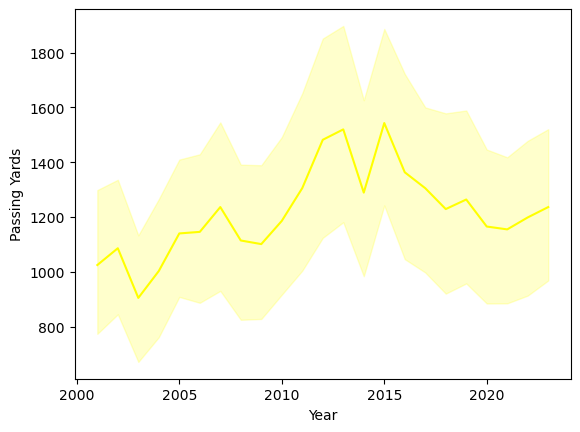

In [296]:
sns.lineplot(x='Year', y='Yds', data = df_nfl, color = 'Yellow')
plt.ylabel('Passing Yards')
plt.show()

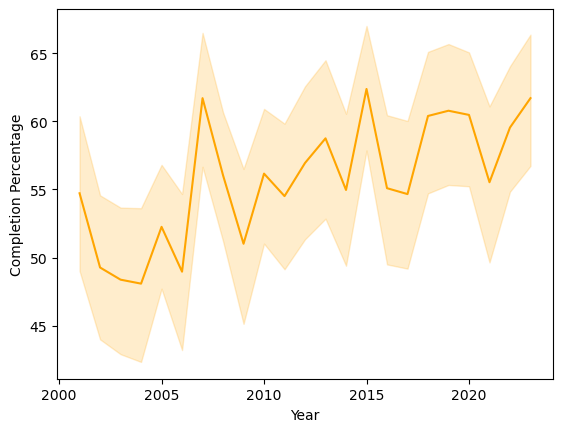

In [297]:
sns.lineplot(x='Year', y='Cmp%', data = df_nfl, color = 'Orange')
plt.ylabel('Completion Percentage')
plt.show()

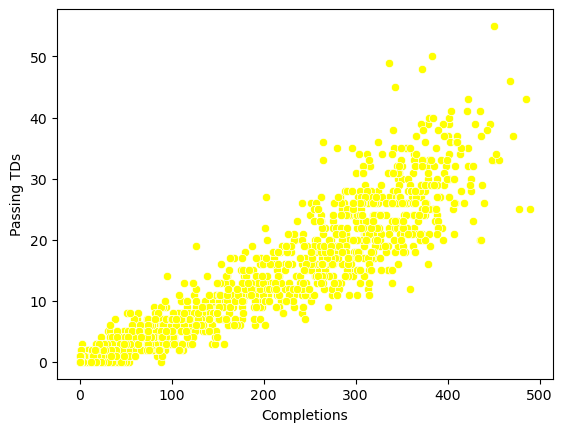

In [298]:
sns.scatterplot(x='Cmp', y='TD', data = df_nfl, color = 'Yellow')
plt.xlabel('Completions')
plt.ylabel('Passing TDs')
plt.show()

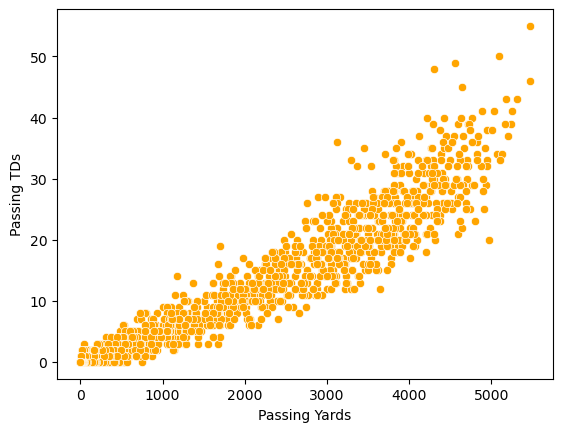

In [299]:
sns.scatterplot(x='Yds', y='TD', data = df_nfl, color = 'Orange')
plt.xlabel('Passing Yards')
plt.ylabel('Passing TDs')
plt.show()

In [300]:
x = df_nfl[['Age', 'G', 'Yds', 'Rate', 'Int', 'Sk']]
y = df_nfl['TD']

In [301]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [302]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)
print(x_train)

[[-0.03984093  0.83096271  1.75831933  0.83288306  0.61137355  1.39957648]
 [-0.27101673 -1.6538065  -0.77893345 -1.09721049 -0.81289197 -0.80416945]
 [ 2.04074119  1.00844623  2.03637443  0.45182125  1.14547312  2.43258238]
 ...
 [-0.50219252  1.00844623  1.38189569  0.07075944  1.85760588  2.36371532]
 [ 0.19133486  1.00844623 -0.78024503  1.39673061 -0.81289197 -0.80416945]
 [-0.50219252 -1.12135596 -0.42611825 -0.70375643 -0.2787924  -0.25323297]]


In [303]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [304]:
coeff_df_nfl = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_nfl

,Coefficient
Age,-0.066098
G,0.076758
Yds,12.476762
Rate,0.280643
Int,-1.449303
Sk,-1.673009


In [305]:
y_pred = regressor.predict(x_test)

In [306]:
df_actual_vs_predicted = pd.DataFrame({'Actual Passing TDs': y_test, 'Predicted Passing TDs': y_pred})
df_actual_vs_predicted['Predicted Passing TDs'].clip(lower=0, inplace=True)
df_actual_vs_predicted['Predicted Passing TDs'] = df_actual_vs_predicted['Predicted Passing TDs'].round().astype(int)
print(df_actual_vs_predicted.head(10).to_string(index=False))

 Actual Passing TDs  Predicted Passing TDs
                  0                      0
                  3                      3
                  0                      0
                 38                     34
                  4                      2
                  0                      0
                 20                     26
                 26                     23
                 33                     28
                  1                      1


In [307]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.515103872778928
Mean Squared Error: 5.930354130006801
Root Mean Squared Error: 2.435231843173623


In [308]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.9445198168752365


In [309]:
print('Intercept:', regressor.intercept_)

Intercept: 7.270212765957447
